**Bigmart Product Sale Prediction**

In [1]:

#step1 : import librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',100)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#loading the data set

train= pd.read_csv(r"E:\bigmart\bigmartsale/train.csv")
test=pd.read_csv(r"E:\bigmart\bigmartsale/test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### EDA

**1 Feature Engineering**

#### step1 PREVIEWING DATASETS

In [4]:
train.shape

(8523, 12)

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### step2 Cheking the missing value

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
nullcolumn=[i for i in train if train[i].isna().sum()>0]

In [8]:
nullcolumn

['Item_Weight', 'Outlet_Size']

In [9]:
#next we can check the null percentage of nulcolumn
#if null percentage is greater than 45% ,then drop it,else filling null make the column shootup

In [10]:
nullperc=train.apply(lambda train:np.round(100*train.isnull().sum()/train.shape[0],2))

In [11]:
nullperc.sort_values(ascending=False)

Outlet_Size                  28.28
Item_Weight                  17.17
Item_Identifier               0.00
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

In [12]:
#so in here nullcomun null percentage is not above 45 so we can stay it and fill the null

#### step3 handling the missing value

In [13]:

for i in train:
    if train[i].dtypes =="object":
        train[i].fillna(train[i].mode()[0],inplace=True)
    else:
        train[i].fillna(train[i].mean(),inplace=True)

In [14]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Step4 Plotting the numerical column w.r.t to dependent column

In [16]:
#for plotting numerical column we need to slice numerical column first


In [17]:
numc=train.select_dtypes(np.number).columns

In [18]:
numc

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

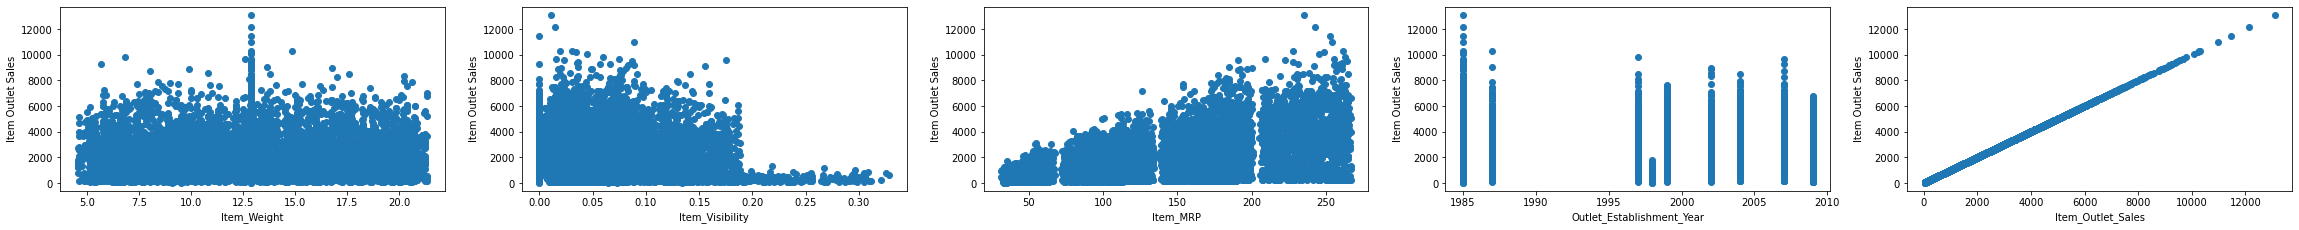

In [19]:
j=0
plt.figure(figsize=(40,40))
for i in numc:
    plt.subplot(10,5,j+1)
    plt.scatter(train[i],train['Item_Outlet_Sales'])
    plt.xlabel(i)
    plt.ylabel('Item Outlet Sales')
    j+=1

#### Step5 : Handling the outlayer

In [20]:
#Mainly oulayer is come in contiunues coolumn
# so in here i splitting continues column and discrete column sperately from numerical columns

In [21]:
conc=[] # conc for storing continues column 
disc=[]# disc for storing discrete column
for i in numc:
    if train[i].nunique()>20:
        conc.append(i)
    else:
        disc.append(i)


In [22]:
conc

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [23]:
disc

['Outlet_Establishment_Year']

In [24]:
train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [25]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [26]:
train['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [27]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [28]:
#for handling the outlayer we use capping method , ie capping with upper limit and low limit if min and max of the column is more or less than it

In [29]:
for i in conc:
    upp_lim=train[i].mean()+3*train[i].std()
    low_lim=train[i].mean()-3*train[i].std()

    train.loc[(train[i]>upp_lim),i]=upp_lim
    train.loc[(train[i]<low_lim),i]=low_lim

In [30]:
train['Item_Outlet_Sales'].describe()

count    8523.000000
mean     2169.064715
std      1661.273963
min        33.290000
25%       834.247400
50%      1794.331000
75%      3101.296400
max      7300.787761
Name: Item_Outlet_Sales, dtype: float64

In [31]:
#so in here we can clearly see the diffrence the max of Item_Outlet_Sales before capping its 13086.964800
#after capping it changes to 7300.787761,ie the outlayer in the column is treated perfectly

In [32]:
#now lets again plot coninues column once more


#### Step6 plotting continues column

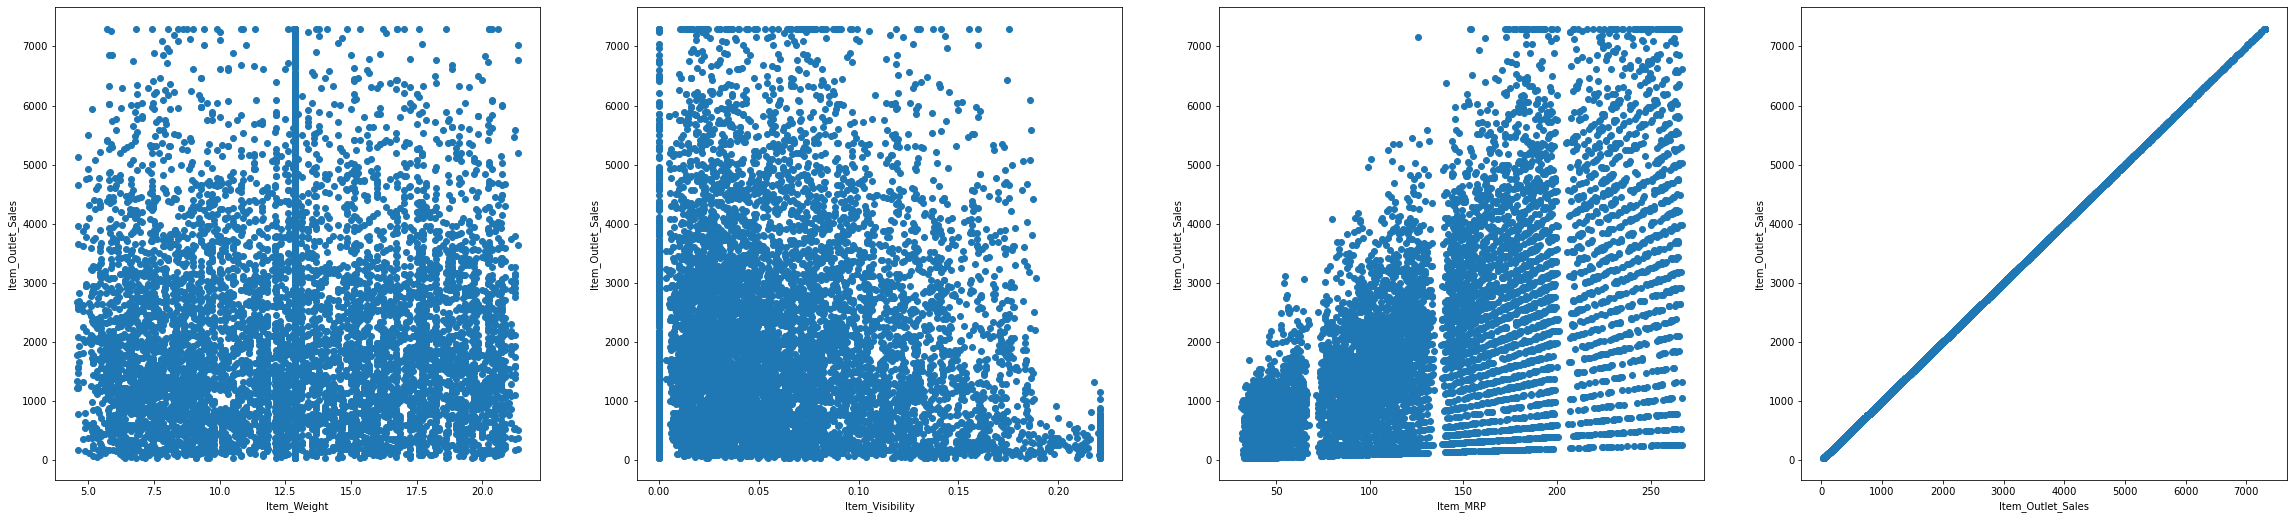

In [33]:
j=0
plt.figure(figsize=(40,40))
for i in conc:
    plt.subplot(4,4,j+1)
    plt.scatter(train[i],train['Item_Outlet_Sales'])
    plt.xlabel(i)
    plt.ylabel('Item_Outlet_Sales')
    j+=1

#### Step7 : Categorical Encoding

In [34]:
#For categorical encoding we need to slice object column from main table

In [35]:
#slicing object column
objc=train.select_dtypes(np.object).columns

In [36]:
objc

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [37]:
obj=train[objc]

In [38]:
obj

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [39]:
#reason i make it dataframe for put in lambda equation for encoding
#it is not work were variable only store column name 

In [40]:
# now iam going to encode category column using label encoder , ie i am going to give ranking

In [41]:
from collections import defaultdict

encoder= defaultdict(LabelEncoder)

object= obj.apply(lambda obj: encoder[obj.name].fit_transform(obj))


In [42]:
object

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,1,2,0
4,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,370,1,13,1,0,2,1
8519,897,2,0,7,1,1,1
8520,1357,1,8,6,2,1,1
8521,681,2,13,3,1,2,2


In [43]:
object['Item_Fat_Content'].value_counts()

1    5089
2    2889
0     316
4     117
3     112
Name: Item_Fat_Content, dtype: int64

In [44]:
obj['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [45]:
# in the above you can see how it rank each column 
#encoder give low fat rank 1 ,vice versa

#### Step 8 concatinating

In [46]:
# in here we are going to concatinate  numerical column and encoded categorical column into new table

In [47]:
train.drop(objc,axis=1,inplace=True)


In [48]:
train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [49]:
dff=pd.concat([object,train],axis=1)

In [50]:
dff

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,156,1,4,9,1,0,1,9.300,0.016047,249.8092,1999,3735.1380
1,8,2,14,3,1,2,2,5.920,0.019278,48.2692,2009,443.4228
2,662,1,10,9,1,0,1,17.500,0.016760,141.6180,1999,2097.2700
3,1121,2,6,0,1,2,0,19.200,0.000000,182.0950,1998,732.3800
4,1297,1,9,1,0,2,1,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,1,13,1,0,2,1,6.865,0.056783,214.5218,1987,2778.3834
8519,897,2,0,7,1,1,1,8.380,0.046982,108.1570,2002,549.2850
8520,1357,1,8,6,2,1,1,10.600,0.035186,85.1224,2004,1193.1136
8521,681,2,13,3,1,2,2,7.210,0.145221,103.1332,2009,1845.5976


**2 Feature Selection**

In [51]:
# Select in this process we are selecting higly correlated independt column w.r.t to output

#### Step 1 correlation

In [52]:
x=abs(dff.corr()['Item_Outlet_Sales'])


In [53]:
x

Item_Identifier              0.002839
Item_Fat_Content             0.009672
Item_Type                    0.017307
Outlet_Identifier            0.166349
Outlet_Size                  0.086717
Outlet_Location_Type         0.086254
Outlet_Type                  0.400809
Item_Weight                  0.011997
Item_Visibility              0.124278
Item_MRP                     0.572033
Outlet_Establishment_Year    0.042671
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [54]:
#in here i taking the column which has correlation >0.3
#not only that after i read case scenario i feel this column matter more

In [55]:
p=x[x>0.3]

In [56]:
p

Outlet_Type          0.400809
Item_MRP             0.572033
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64

In [57]:
data=dff[p.index]

In [58]:
data

,Outlet_Type,Item_MRP,Item_Outlet_Sales
0,1,249.8092,3735.1380
1,2,48.2692,443.4228
2,1,141.6180,2097.2700
3,0,182.0950,732.3800
4,1,53.8614,994.7052
...,...,...,...
8518,1,214.5218,2778.3834
8519,1,108.1570,549.2850
8520,1,85.1224,1193.1136
8521,2,103.1332,1845.5976


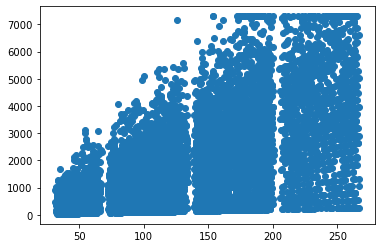

In [59]:
plt.scatter(data['Item_MRP'],data['Item_Outlet_Sales'])

In [60]:
# the scatter plot show price is positevly correkated with sales

**Ml MOdel Creation And Training**

#### Step1 : Splitting Independt and dependt column seperately

In [61]:
x=data.drop(['Item_Outlet_Sales'],axis=1)

In [62]:
x # stored input column

,Outlet_Type,Item_MRP
0,1,249.8092
1,2,48.2692
2,1,141.6180
3,0,182.0950
4,1,53.8614
...,...,...
8518,1,214.5218
8519,1,108.1570
8520,1,85.1224
8521,2,103.1332


In [63]:
y=dff['Item_Outlet_Sales']

In [64]:
y # stored output column

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

#### Step2 Train Test Split Method

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [67]:
X_train

,Outlet_Type,Item_MRP
1921,0,116.6466
655,1,103.0332
2229,3,129.1310
2537,1,222.6088
3528,1,184.8266
...,...,...
5734,0,139.1838
5191,1,75.6670
5390,1,237.3590
860,1,117.9466


In [68]:
X_test

,Outlet_Type,Item_MRP
7503,1,79.4302
2957,1,42.7086
7031,1,42.0454
1084,3,173.7054
856,1,197.5110
...,...,...
443,1,120.5124
777,1,184.8240
1119,0,191.9504
3209,1,128.6994


In [69]:
y_train

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

In [70]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
443     2133.2232
777     4287.7520
1119     767.0016
3209     642.4970
3742    2570.6538
Name: Item_Outlet_Sales, Length: 2557, dtype: float64

#### Step3: Scaling Down

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc=StandardScaler()

In [73]:
#in here first i fit transform x_train,with mean and standard deviation value of each column of x_train, with that value i tranform x_test

In [74]:
X_train=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [75]:
X_train

,Outlet_Type,Item_MRP
0,-1.513401,-0.401895
1,-0.262681,-0.619284
2,2.238761,-0.202535
3,-0.262681,1.290187
4,-0.262681,0.686853
...,...,...
5961,-1.513401,-0.042005
5962,-0.262681,-1.056288
5963,-0.262681,1.525729
5964,-0.262681,-0.381136


In [76]:
X_test

,Outlet_Type,Item_MRP
0,-0.262681,-0.996194
1,-0.262681,-1.582592
2,-0.262681,-1.593182
3,2.238761,0.509262
4,-0.262681,0.889407
...,...,...
2552,-0.262681,-0.340164
2553,-0.262681,0.686812
2554,-1.513401,0.800611
2555,-0.262681,-0.209427


In [77]:
#Scale down actually help model to predict Faster

#### Step3: model training

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr=LinearRegression()

In [80]:
lr.fit(X_train, y_train)

LinearRegression()

In [81]:
pv=lr.predict(X_test)

In [82]:
pv

array([1051.58640263,  483.16450323,  472.89868138, ..., 1961.06748098,
       1814.23542244, 3445.68998536])

In [83]:
X_test.shape

(2557, 2)

In [84]:
y_test.shape

(2557,)

In [85]:
lr.score(X_test,y_test)

0.4983124517562082

**Plotting Assumptions Check our model is performing good or bad**

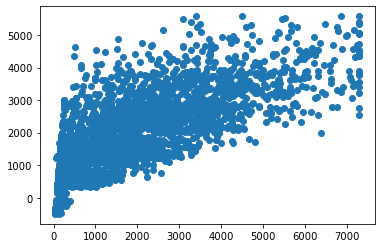

In [86]:
#plot scatter plot for prediction, if the scatter point we get is linear then we can say that pur model actually perform very well
plt.scatter(y_test,pv)

In [87]:
# from above plot we can see that our point is almost linear
# so yes our model perform very well

In [88]:
#Next i am going to plot residuals
#Residuals means error
# ie error w.r.t y_test and prediction value
residuals=y_test-pv

In [89]:
residuals

7503     691.477997
2957    -126.295703
7031     -95.390081
1084    1603.096017
856     -522.453644
           ...     
443      445.716191
777     1604.751280
1119   -1194.065881
3209   -1171.738422
3742    -875.036185
Name: Item_Outlet_Sales, Length: 2557, dtype: float64

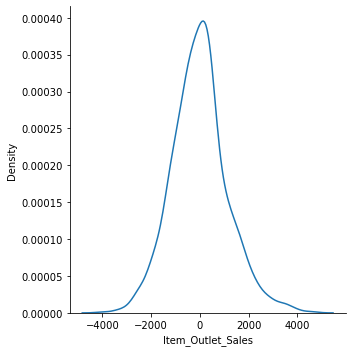

In [90]:
#ploting the residuals
sns.displot(residuals,kind='kde')

In [91]:
#After plotting displot we get a alomost perfect normal distributed curve 
#it means our model working perfectly

In [92]:
lr.coef_ #M value (coefficent o slope)

array([665.41183093, 969.3455912 ])

In [93]:
lr.intercept_ #b value (y intercept)

2192.033862643782

In [94]:
from sklearn .metrics import mean_squared_error

mean_squared_error(y_test,pv)

1337635.147306992

**Performance Metrics**

In [95]:
#R2(R SQUARE)= 1-RSS/TSS 
#ADJR2(ADJUSTED R SQUARE)=1-(1-R2)*(N-1)/(N-P-1)
#where n means number of rows ,p means number of features

In [96]:
#r2square value is the value we get when we take score

In [97]:
r2square= lr.score(X_test,y_test)

In [98]:
r2square

0.4983124517562082

In [99]:
# next i cheking adjusted r2 , always rember that adjusted r2< r2

In [100]:
adjr2square= 1- (1-r2square)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [101]:
adjr2square

0.49791958758373844

In [102]:
#so in here we can clearly say that adjr2square < r2square

**Pickle the model file for Deployment**

In [103]:
#in this  step  i converting trained model and standard scaler value to pickle for deployment purpose


In [104]:
import pickle

In [105]:
#storing standard scaler value as pickle file
import pickle
pickle.dump(sc,open('scaling.pkl', 'wb'))

In [106]:
#dumping ie saving or model inside regmodel.pkl
pickle.dump(lr,open('regmodel.pkl','wb'))